In [8]:
import random
import seaborn as sns
import pandas as pd

In [9]:
# all_pcs = [6000, 6005, 6006, 6007, 6008, 6009, 6010, 6011, 6014, 6015, 6017, 6018, 6019, 6020, 6021, 6023, 6024,
#                   6025, 6026, 6027, 6028, 6029, 6030, 6035, 6036, 6038, 6041, 6050, 6053, 6054, 6055, 6056, 6058, 6059,
#                   6061, 6062, 6063, 6064, 6065,
#                   6066, 6069, 6073, 6084, 6090, 6101, 6102, 6103, 6104, 6105, 6107, 6108, 6109, 6110, 6111, 6112, 6123,
#                   6147, 6148, 6149, 6150, 6151, 6152, 6153, 6154, 6155, 6157, 6159, 6162, 6163, 6164, 6166, 6167, 6168,
#                   6170, 6171, 6173, 6208, 6210,
#                   6211, 6220, 6230, 6232, 6233, 6237, 6254, 6271, 6280, 6281, 6284, 6312, 6317, 6324, 6330, 6391, 6401,
#                   6426, 6430, 6432, 6509, 6528, 6530]

In [10]:
# time_series_25 = []

# for i in range(0,10):
#     sample = random.sample(all_pcs, 75)
#     time_series_25.append(sample)

## Plots and Result Tables

In [11]:
# bottom up aggregation results
hf_df = pd.read_csv('../swis_ts_data/hf_dataframe_errors.csv', index_col=0)

In [12]:
hf_df.head()

,run,sample,category,method,error
0,0,0,0,naive,0.322681
1,0,0,0,arima,0.321692
2,0,0,0,conventional_lstm,0.231297
3,1,0,0,conventional_lstm,0.246363
4,2,0,0,conventional_lstm,0.233219


In [13]:
# this will take the mean across runs

temp_df = hf_df.groupby(['sample', 'category', 'method']).agg({'error': 'mean'}).reset_index()

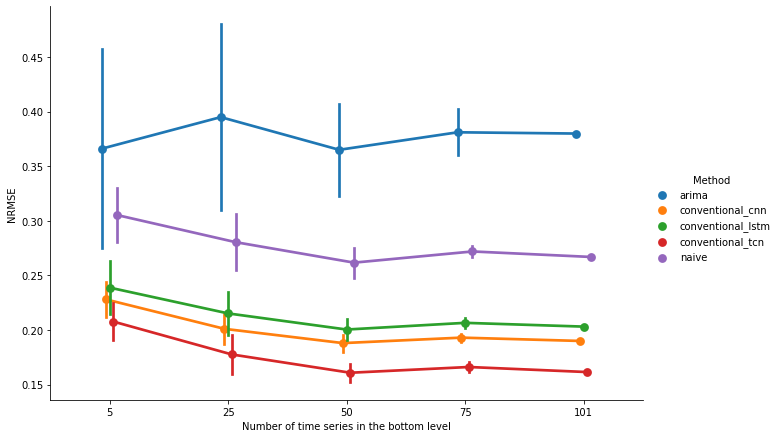

In [14]:
plt_benchmark = sns.catplot(data=temp_df, x='category', y='error', hue='method', kind="point", ci='sd',
                dodge=True, figsize=(20,70), height=6, aspect=1.5)
plt_benchmark.set_xticklabels(['5', '25', '50', '75', '101'])
plt_benchmark.set(xlabel='Number of time series in the bottom level', ylabel='NRMSE')
plt_benchmark._legend.set_title('Method')

In [15]:
def get_df_method(approach_df, method_name):
    runs = approach_df.values
    df = []

    for run in range(0,len(runs)):
        df.append([run, 0, 4, method_name, runs[run][0]])
        
    return pd.DataFrame(df, columns=['run', 'sample', 'category', 'method', 'error'])


# methodA 101 results
approachA = pd.read_csv('../swis_combined_nn_results/approachA/SWIS_APPROACH_A_more_layer_without_norm/errors/final_errors.csv', index_col=0)

#methodB 101 results
approachB = pd.read_csv('../swis_combined_nn_results/approachB/SWIS_APPROACH_B/errors/final_errors.csv', index_col=0)

df_A = get_df_method(approachA, 'method-A')
# df_B = get_df_method(approachB, 'method-B')

# append these to bottom up table
new_hf_df = hf_df.append(df_A, ignore_index=True)

# new_hf_df = new_hf_df.append(df_B, ignore_index=True)

In [16]:
# approachA

In [17]:
# method A category results
methodA_df = pd.read_csv('../swis_ts_data/hf_dataframe_errors_methodA.csv', index_col=0)

# method B category results
# methodB_df = pd.read_csv('../swis_ts_data/hf_dataframe_errors_methodB.csv', index_col=0)

# methodAA_df = pd.read_csv('../swis_ts_data/hf_dataframe_errors_methodAA.csv', index_col=0)

In [18]:
# append them together
new_hf_df = new_hf_df.append(methodA_df, ignore_index=True)


# new_hf_df = new_hf_df.append(methodB_df, ignore_index=True)
# new_hf_df = new_hf_df.append(methodAA_df, ignore_index=True)

In [19]:
ensemble_df = pd.read_csv('../swis_ts_data/hf_dataframe_errors_ensemble.csv', index_col=0)
new_hf_df = new_hf_df.append(ensemble_df, ignore_index=True)

In [20]:
# we will take the mean across runs
temp_df2 = new_hf_df.loc[new_hf_df['method'].isin(['ensemble', 'conventional_tcn', 'method-A'])]

In [21]:
temp_df2 = temp_df2.groupby(['sample', 'category', 'method']).agg({'error': 'mean'}).reset_index()

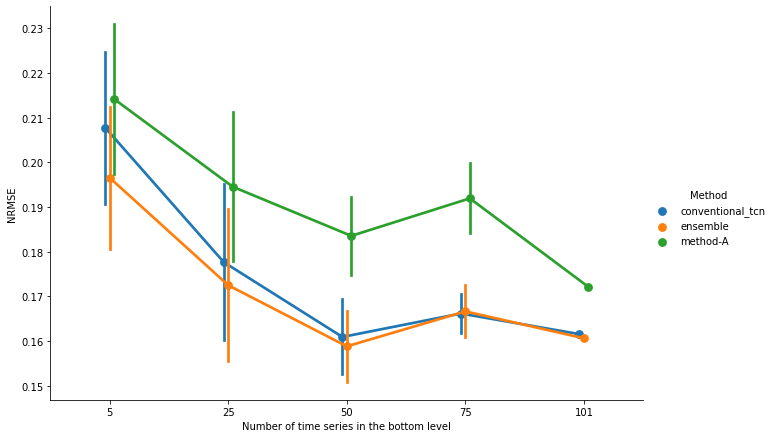

In [22]:
# final plot


plt_all_data = sns.catplot(data=temp_df2, x='category', y='error', hue='method', kind="point", ci='sd',
                dodge=True, figsize=(20,70), height=6, aspect=1.5)
plt_all_data.set_xticklabels(['5', '25', '50', '75', '101'])
plt_all_data.set(xlabel='Number of time series in the bottom level', ylabel='NRMSE')
plt_all_data._legend.set_title('Method')

In [37]:
table = temp_df2.groupby(by=['category', 'method']).agg({'error': ['mean', 'median', 'std', 'min']})

table.to_csv('../swis_ts_data/comparison.csv')

In [38]:
table

error                              
                               mean    median       std       min
category method                                                  
0        conventional_tcn  0.207779  0.206735  0.017958  0.174330
         ensemble          0.196572  0.198051  0.016722  0.166897
         method-A          0.214200  0.217654  0.017650  0.185907
1        conventional_tcn  0.177676  0.173848  0.018376  0.153052
         ensemble          0.172507  0.170366  0.017945  0.146261
         method-A          0.194569  0.194405  0.017568  0.168199
2        conventional_tcn  0.160939  0.159869  0.008859  0.150856
         ensemble          0.158840  0.159529  0.008398  0.144872
         method-A          0.183571  0.182567  0.009254  0.167150
3        conventional_tcn  0.166191  0.166096  0.004597  0.158683
         ensemble          0.166663  0.164446  0.006125  0.158619
         method-A          0.191967  0.191531  0.008243  0.182948
4        conventional_tcn  0.161564  0.161564       NaN  0.161564
         ensemble          0.160646  0.160646       NaN  0.160646
         method-A          0.172150  0.172150       NaN  0.172150

In [23]:
test_err= new_hf_df.groupby(['sample', 'category', 'method']).agg({'error': ['mean', 'min', 'std']}).reset_index()

In [24]:
test_err.loc[test_err['category']==4]

sample category             method     error                    
                                           mean       min       std
28      0        4              arima  0.379956  0.379956       NaN
29      0        4   conventional_cnn  0.190054  0.185353  0.004253
30      0        4  conventional_lstm  0.203182  0.183753  0.010369
31      0        4   conventional_tcn  0.161564  0.155611  0.004206
32      0        4           ensemble  0.160646  0.146273  0.008402
33      0        4           method-A  0.172150  0.159659  0.009501
34      0        4              naive  0.266963  0.266963       NaN

In [28]:
tcn = new_hf_df.loc[new_hf_df['method'] == 'conventional_tcn']
tcn.loc[tcn['category'] == 4]

,run,sample,category,method,error
1302,0,0,4,conventional_tcn,0.167371
1303,1,0,4,conventional_tcn,0.160375
1304,2,0,4,conventional_tcn,0.158487
1305,3,0,4,conventional_tcn,0.158679
1306,4,0,4,conventional_tcn,0.161046
1307,5,0,4,conventional_tcn,0.161824
1308,6,0,4,conventional_tcn,0.158264
1309,7,0,4,conventional_tcn,0.155611
1310,8,0,4,conventional_tcn,0.166388
1311,9,0,4,conventional_tcn,0.167592


In [21]:
new_errors = pd.read_csv('../swis_combined_nn_results/all_errors.csv', index_col=0)

In [22]:
new_errors.groupby(['model_name','Level']).agg({'error': ['mean', 'median', 'std', 'min']})

error                              
                                            mean    median       std       min
model_name                       Level                                        
pc_2d_conv_with_grid_tcn         grid   0.285581  0.273826  0.044427  0.236387
pc_2d_conv_with_grid_tcn_method2 grid   0.241654  0.232765  0.033256  0.206461

In [4]:
new_errors = pd.read_csv('../swis_combined_nn_results/all_errors.csv', index_col=0)
new_errors.groupby(['model_name','Level']).agg({'error': ['mean', 'median', 'std', 'min']})

error            \
                                                             mean    median   
model_name                                        Level                       
SWIS_APPROACH_A_more_layer_without_norm_grid_skip grid   0.235275  0.240642   
pc_2d_conv_with_grid_tcn                          grid   0.322720  0.304736   
pc_2d_conv_with_grid_tcn_method2                  grid   0.313318  0.288299   
swis_pc_grid_parallel                             grid   0.215139  0.209381   

                                                                             
                                                              std       min  
model_name                                        Level                      
SWIS_APPROACH_A_more_layer_without_norm_grid_skip grid   0.024484  0.201062  
pc_2d_conv_with_grid_tcn                          grid   0.075569  0.235958  
pc_2d_conv_with_grid_tcn_method2                  grid   0.072568  0.228603  
swis_pc_grid_parallel                             grid   0.032313  0.174823

In [5]:
new_errors2 = pd.read_csv('../swis_combined_nn_results/all_errors_new.csv', index_col=0)
new_errors2.groupby(['model_name','Level']).agg({'error': ['mean', 'median', 'std', 'min']})

error                      \
                                             mean    median       std   
model_name                        Level                                 
SWIS_APPROACH_A_with_weather_only grid   0.209063  0.199585  0.023738   
concat_pc_with_grid_tcn           grid   0.175837  0.176203  0.005134   
concat_pc_with_grid_tcn2          grid   0.168919  0.166838  0.012649   
grid_conv_in_each_pc_seperately   pc     0.160594  0.161032  0.005980   
pc_2d_conv_with_grid_tcn          grid   0.270816  0.268378  0.017586   
pc_2d_conv_with_grid_tcn_method2  grid   0.212163  0.211519  0.014281   

                                                   
                                              min  
model_name                        Level            
SWIS_APPROACH_A_with_weather_only grid   0.183421  
concat_pc_with_grid_tcn           grid   0.168053  
concat_pc_with_grid_tcn2          grid   0.152105  
grid_conv_in_each_pc_seperately   pc     0.151910  
pc_2d_conv_with_grid_tcn          grid   0.246424  
pc_2d_conv_with_grid_tcn_method2  grid   0.189008

In [7]:
new_errors2.loc[new_errors2['model_name'] == 'concat_pc_with_grid_tcn2']

,model_name,error,run,Level
50,concat_pc_with_grid_tcn2,0.167614,0,grid
51,concat_pc_with_grid_tcn2,0.161291,1,grid
52,concat_pc_with_grid_tcn2,0.200551,2,grid
53,concat_pc_with_grid_tcn2,0.175128,3,grid
54,concat_pc_with_grid_tcn2,0.167888,4,grid
55,concat_pc_with_grid_tcn2,0.152105,5,grid
56,concat_pc_with_grid_tcn2,0.164890,6,grid
57,concat_pc_with_grid_tcn2,0.166061,7,grid
58,concat_pc_with_grid_tcn2,0.170297,8,grid
59,concat_pc_with_grid_tcn2,0.163362,9,grid


In [31]:
tcn.loc[tcn['category'] == 4]

,run,sample,category,method,error
1302,0,0,4,conventional_tcn,0.167371
1303,1,0,4,conventional_tcn,0.160375
1304,2,0,4,conventional_tcn,0.158487
1305,3,0,4,conventional_tcn,0.158679
1306,4,0,4,conventional_tcn,0.161046
1307,5,0,4,conventional_tcn,0.161824
1308,6,0,4,conventional_tcn,0.158264
1309,7,0,4,conventional_tcn,0.155611
1310,8,0,4,conventional_tcn,0.166388
1311,9,0,4,conventional_tcn,0.167592


Explore the loss curve

In [6]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [18]:
def plot_loss():
#     loss1 = pd.read_pickle(f'../swis_combined_nn_results/training_loss_grid_iteration_2d_1')
#     loss2 = pd.read_pickle(f'../swis_combined_nn_results/training_loss_grid_iteration_2d_2')
    loss3 = pd.read_pickle(f'../swis_combined_nn_results/training_loss_grid_iteration_approachA')
    loss4 = pd.read_pickle(f'../swis_combined_nn_results/training_loss_grid_iteration_weatherA')
    loss5 = pd.read_pickle(f'../swis_combined_nn_results/training_loss_grid_iteration_weatherB')


    fig = go.Figure()

#     fig.add_trace(go.Scatter(y= loss1['loss']))
#     fig.add_trace(go.Scatter(y= loss2['loss']))
    fig.add_trace(go.Scatter(y= loss3['loss']))
    fig.add_trace(go.Scatter(y= loss4['loss']))
    fig.add_trace(go.Scatter(y= loss5['loss']))

    fig.show()

In [19]:
plot_loss()